In [ ]:
import random

def create_sample_documents():
    documents = []

    # Sample sentences for each topic
    sports_sentences = [
        "The local team won the championship with a last-minute goal.",
        "Athletes are training rigorously for the upcoming Olympic games.",
        "Basketball is a popular sport played by millions worldwide.",
        "The football manager announced his retirement after a successful season.",
        "Tennis star wins grand slam title, breaking multiple records.",
        "Cycling tour covers thousands of miles across challenging terrain."
    ]
    politics_sentences = [
        "The government is debating a new economic policy in parliament.",
        "Voters are preparing for the upcoming general election.",
        "International leaders met to discuss global climate change initiatives.",
        "New legislation was proposed to address housing shortages.",
        "The presidential debate focused on healthcare and education reforms.",
        "Local council members approved a new urban development plan."
    ]
    health_sentences = [
        "Doctors recommend regular exercise for a healthy lifestyle.",
        "Researchers made a breakthrough in cancer treatment.",
        "Public health campaigns emphasize the importance of vaccination.",
        "Nutritionists advise a balanced diet for overall well-being.",
        "Mental health awareness is gaining more traction globally.",
        "New medical technologies are improving diagnostic accuracy."
    ]
    technology_sentences = [
        "Artificial intelligence is transforming various industries.",
        "The new smartphone features an advanced camera system.",
        "Software developers are working on the next generation of applications.",
        "Cybersecurity threats are a growing concern for businesses.",
        "Cloud computing offers scalable solutions for data storage.",
        "Virtual reality headsets are becoming more immersive."
    ]

    # Assign topics and create documents, ensuring roughly 5-6 per topic
    topics = {
        "sports": sports_sentences,
        "politics": politics_sentences,
        "health": health_sentences,
        "technology": technology_sentences
    }

    for topic, sentences in topics.items():
        for sentence in sentences:
            documents.append({"topic": topic, "document": sentence})

    # Shuffle to mix topics, and trim/expand to 20-25 if needed (simple approach for now)
    random.shuffle(documents)

    # Ensure 20-25 documents - this example has 24, which fits
    # If it was less, we'd add more, if more, we'd truncate.

    return documents

# Create the dataset
dataset = create_sample_documents()

print(f"Generated {len(dataset)} documents.")
# Display the first few documents to see the structure
for i, doc in enumerate(dataset[:5]):
    print(f"Document {i+1}: Topic='{doc['topic']}', Content='{doc['document'][:50]}...'")

Generated 24 documents.
Document 1: Topic='technology', Content='Artificial intelligence is transforming various in...'
Document 2: Topic='sports', Content='Cycling tour covers thousands of miles across chal...'
Document 3: Topic='sports', Content='The local team won the championship with a last-mi...'
Document 4: Topic='politics', Content='International leaders met to discuss global climat...'
Document 5: Topic='sports', Content='Athletes are training rigorously for the upcoming ...'


In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

print("Essential libraries and NLTK data imported successfully.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Essential libraries and NLTK data imported successfully.


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords and perform lemmatization
    processed_tokens = [
        lemmatizer.lemmatize(word) for word in tokens if word not in stop_words
    ]

    return " ".join(processed_tokens)

# Apply preprocessing to each document in the dataset
processed_documents = []
for doc in dataset:
    processed_content = preprocess_text(doc['document'])
    processed_documents.append({'topic': doc['topic'], 'document': processed_content})

print(f"Original document count: {len(dataset)}")
print(f"Processed document count: {len(processed_documents)}")

# Display the first few processed documents to verify
print("\nFirst 5 Processed Documents:")
for i, doc in enumerate(processed_documents[:5]):
    print(f"Document {i+1}: Topic='{doc['topic']}', Content='{doc['document'][:50]}...' ")

Original document count: 24
Processed document count: 24

First 5 Processed Documents:
Document 1: Topic='technology', Content='artificial intelligence transforming various indus...' 
Document 2: Topic='sports', Content='cycling tour cover thousand mile across challengin...' 
Document 3: Topic='sports', Content='local team championship lastminute goal...' 
Document 4: Topic='politics', Content='international leader met discus global climate cha...' 
Document 5: Topic='sports', Content='athlete training rigorously upcoming olympic game...' 


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract only the processed document content
document_contents = [doc['document'] for doc in processed_documents]

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents to create TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(document_contents)

print(f"Shape of TF-IDF matrix: {tfidf_matrix.shape}")
print(f"Number of features (unique words): {len(tfidf_vectorizer.get_feature_names_out())}")

Shape of TF-IDF matrix: (24, 141)
Number of features (unique words): 141


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Compute cosine similarity between TF-IDF vectors
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

print(f"Shape of cosine similarity matrix: {cosine_sim_matrix.shape}")

# Display the similarity matrix as a DataFrame for better readability
sim_df = pd.DataFrame(cosine_sim_matrix)
print("\nFirst 5x5 entries of the Cosine Similarity Matrix:")
print(sim_df.iloc[:5, :5])

Shape of cosine similarity matrix: (24, 24)

First 5x5 entries of the Cosine Similarity Matrix:
     0    1    2    3    4
0  1.0  0.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0
3  0.0  0.0  0.0  1.0  0.0
4  0.0  0.0  0.0  0.0  1.0


In [ ]:
def get_top_n_similar_documents(doc_index, similarity_matrix, n=5):
    # Get the similarity scores for the document at doc_index
    sim_scores = list(enumerate(similarity_matrix[doc_index]))

    # Sort the documents based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the n most similar documents. Exclude the document itself (index 0)
    sim_scores = sim_scores[1:n+1]

    # Get the document indices and similarity scores
    doc_indices = [i[0] for i in sim_scores]
    scores = [i[1] for i in sim_scores]

    return doc_indices, scores

# Example: Find top 3 similar documents for the first document (index 0)
print("Top 3 similar documents for Document 0:")
top_indices, top_scores = get_top_n_similar_documents(0, cosine_sim_matrix, n=3)

for i, (idx, score) in enumerate(zip(top_indices, top_scores)):
    print(f"  {i+1}. Document {idx} (Topic: {dataset[idx]['topic']}): Similarity Score = {score:.4f}")
    print(f"     Original Content: {dataset[idx]['document'][:70]}...")
    print(f"     Processed Content: {processed_documents[idx]['document'][:70]}...")

print("\nTop 3 similar documents for Document 2:")
top_indices, top_scores = get_top_n_similar_documents(2, cosine_sim_matrix, n=3)

for i, (idx, score) in enumerate(zip(top_indices, top_scores)):
    print(f"  {i+1}. Document {idx} (Topic: {dataset[idx]['topic']}): Similarity Score = {score:.4f}")
    print(f"     Original Content: {dataset[idx]['document'][:70]}...")
    print(f"     Processed Content: {processed_documents[idx]['document'][:70]}...")


Top 3 similar documents for Document 0:
  1. Document 1 (Topic: sports): Similarity Score = 0.0000
     Original Content: Cycling tour covers thousands of miles across challenging terrain....
     Processed Content: cycling tour cover thousand mile across challenging terrain...
  2. Document 2 (Topic: sports): Similarity Score = 0.0000
     Original Content: The local team won the championship with a last-minute goal....
     Processed Content: local team championship lastminute goal...
  3. Document 3 (Topic: politics): Similarity Score = 0.0000
     Original Content: International leaders met to discuss global climate change initiatives...
     Processed Content: international leader met discus global climate change initiative...

Top 3 similar documents for Document 2:
  1. Document 19 (Topic: politics): Similarity Score = 0.1329
     Original Content: Local council members approved a new urban development plan....
     Processed Content: local council member approved new urban deve

In [ ]:
import pandas as pd

# Display the full cosine similarity matrix as a DataFrame
# The 'sim_df' variable already holds this DataFrame.
print("Full Cosine Similarity Matrix:")
display(sim_df)

Full Cosine Similarity Matrix:


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000
1,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000
2,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.132936,0.0,0.000000,0.0,0.00000
3,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000
4,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.148915,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000
5,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.086574,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.075189,0.0,0.086574,0.0,0.00000
6,0.0,0.0,0.000000,0.0,0.148915,0.000000,1.000000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000
7,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000
8,0.0,0.0,0.000000,0.0,0.000000,0.086574,0.000000,0.0,1.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.075189,0.0,0.086574,0.0,0.00000
9,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.13543


In [ ]:
def jaccard_similarity(text1, text2):
    # Convert texts to sets of words
    set1 = set(text1.split())
    set2 = set(text2.split())

    # Handle empty sets to avoid division by zero
    if not set1 and not set2:
        return 1.0  # Both empty, considered 100% similar
    if not set1 or not set2:
        return 0.0  # One is empty, no common elements

    # Calculate intersection and union
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))

    # Calculate Jaccard similarity
    return intersection / union

# Extract processed document contents
document_contents = [doc['document'] for doc in processed_documents]

# Compute Jaccard similarity matrix
jaccard_sim_matrix = []
for i in range(len(document_contents)):
    row = []
    for j in range(len(document_contents)):
        sim = jaccard_similarity(document_contents[i], document_contents[j])
        row.append(sim)
    jaccard_sim_matrix.append(row)

# Convert to DataFrame for better readability
jaccard_df = pd.DataFrame(jaccard_sim_matrix)

print("Full Jaccard Similarity Matrix:")
display(jaccard_df)

Full Jaccard Similarity Matrix:


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.000000,0.0,1.0,0.000000,0.1,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.090909,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.090909,0.0,0.000000
6,0.0,0.0,0.000000,0.0,0.1,0.000000,1.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,0.0,0.0,0.000000,0.0,0.0,0.090909,0.0,0.0,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.090909,0.0,0.000000
9,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.090909


In [ ]:
from nltk.corpus import wordnet as wn
import pandas as pd

def document_wordnet_similarity(doc1_text, doc2_text, similarity_type='wup'):
    tokens1 = doc1_text.split()
    tokens2 = doc2_text.split()

    # Helper function to get max similarity for a synset from one set against another set
    def get_max_sim(synset_list1, synset_list2, sim_func):
        max_sim_val = 0.0
        for s1 in synset_list1:
            for s2 in synset_list2:
                sim = sim_func(s1, s2)
                if sim is not None and sim > max_sim_val:
                    max_sim_val = sim
        return max_sim_val

    # Get all synsets for each word in doc1
    doc1_synsets_by_word = {word: wn.synsets(word) for word in tokens1}
    # Filter out words with no synsets
    doc1_valid_words = [word for word, synsets in doc1_synsets_by_word.items() if synsets]
    doc1_all_synsets = [s for word in doc1_valid_words for s in doc1_synsets_by_word[word]]

    # Get all synsets for each word in doc2
    doc2_synsets_by_word = {word: wn.synsets(word) for word in tokens2}
    # Filter out words with no synsets
    doc2_valid_words = [word for word, synsets in doc2_synsets_by_word.items() if synsets]
    doc2_all_synsets = [s for word in doc2_valid_words for s in doc2_synsets_by_word[word]]

    if not doc1_all_synsets or not doc2_all_synsets:
        return 0.0 # No common words with synsets, or one document is empty

    similarity_function = None
    if similarity_type == 'path':
        similarity_function = lambda s1, s2: s1.path_similarity(s2)
    elif similarity_type == 'wup':
        similarity_function = lambda s1, s2: s1.wup_similarity(s2)
    else:
        raise ValueError("Invalid similarity_type. Choose 'path' or 'wup'.")

    # Calculate average best-match similarity from doc1 to doc2
    sum_sim1 = 0
    count_sim1 = 0
    for word1 in doc1_valid_words:
        synsets1 = doc1_synsets_by_word[word1]
        if synsets1:
            best_sim = get_max_sim(synsets1, doc2_all_synsets, similarity_function)
            if best_sim is not None:
                sum_sim1 += best_sim
                count_sim1 += 1
    avg_sim1 = sum_sim1 / count_sim1 if count_sim1 > 0 else 0

    # Calculate average best-match similarity from doc2 to doc1
    sum_sim2 = 0
    count_sim2 = 0
    for word2 in doc2_valid_words:
        synsets2 = doc2_synsets_by_word[word2]
        if synsets2:
            best_sim = get_max_sim(synsets2, doc1_all_synsets, similarity_function)
            if best_sim is not None:
                sum_sim2 += best_sim
                count_sim2 += 1
    avg_sim2 = sum_sim2 / count_sim2 if count_sim2 > 0 else 0

    # Return the average of the two directional averages
    return (avg_sim1 + avg_sim2) / 2 if (avg_sim1 + avg_sim2) > 0 else 0


# Extract processed document contents
document_contents = [doc['document'] for doc in processed_documents]

# Compute WordNet Wu-Palmer similarity matrix
wordnet_wup_sim_matrix = []
for i in range(len(document_contents)):
    row = []
    for j in range(len(document_contents)):
        sim = document_wordnet_similarity(document_contents[i], document_contents[j], similarity_type='wup')
        row.append(sim)
    wordnet_wup_sim_matrix.append(row)

# Convert to DataFrame for better readability
wordnet_wup_df = pd.DataFrame(wordnet_wup_sim_matrix)

print("Full WordNet Wu-Palmer Similarity Matrix:")
display(wordnet_wup_df)


# Compute WordNet Path similarity matrix (optional, for comparison)
# wordnet_path_sim_matrix = []
# for i in range(len(document_contents)):
#     row = []
#     for j in range(len(document_contents)):
#         sim = document_wordnet_similarity(document_contents[i], document_contents[j], similarity_type='path')
#         row.append(sim)
#     wordnet_path_sim_matrix.append(row)
#
# wordnet_path_df = pd.DataFrame(wordnet_path_sim_matrix)
# print("\nFull WordNet Path Similarity Matrix:")
# display(wordnet_path_df)

Full WordNet Wu-Palmer Similarity Matrix:


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.000000,0.519638,0.611447,0.508429,0.540490,0.534152,0.485638,0.639449,0.502857,0.514479,...,0.453544,0.571509,0.636793,0.542740,0.520359,0.606433,0.547007,0.530741,0.683206,0.539363
1,0.519638,1.000000,0.580479,0.598501,0.612653,0.524098,0.552799,0.609850,0.555096,0.486202,...,0.567881,0.622863,0.602652,0.477558,0.630395,0.589005,0.563947,0.568155,0.599122,0.567849
2,0.611447,0.580479,1.000000,0.676606,0.643401,0.552378,0.554374,0.679082,0.668750,0.522716,...,0.523280,0.626790,0.661504,0.566767,0.582188,0.761195,0.528430,0.595414,0.682911,0.611285
3,0.508429,0.598501,0.676606,1.000000,0.610056,0.535762,0.607778,0.627567,0.659505,0.573856,...,0.587159,0.587261,0.632241,0.551246,0.624623,0.627830,0.577859,0.495851,0.642791,0.593323
4,0.540490,0.612653,0.643401,0.610056,1.000000,0.584589,0.758187,0.611048,0.631370,0.518382,...,0.586807,0.633234,0.610549,0.520360,0.650840,0.610710,0.651657,0.600731,0.695232,0.570406
5,0.534152,0.524098,0.552378,0.535762,0.584589,1.000000,0.526665,0.613252,0.660065,0.554689,...,0.466342,0.672230,0.568615,0.549085,0.523801,0.627737,0.632687,0.624799,0.617851,0.568657
6,0.485638,0.552799,0.554374,0.607778,0.758187,0.526665,1.000000,0.614885,0.533193,0.510613,...,0.578304,0.555537,0.635376,0.498865,0.713158,0.536829,0.590142,0.500644,0.623333,0.570874
7,0.639449,0.609850,0.679082,0.627567,0.611048,0.613252,0.614885,1.000000,0.657285,0.591545,...,0.559261,0.647818,0.664116,0.567064,0.617114,0.629386,0.588989,0.631553,0.764400,0.654487
8,0.502857,0.555096,0.668750,0.659505,0.631370,0.660065,0.533193,0.657285,1.000000,0.572609,...,0.610828,0.545495,0.635232,0.573742,0.543333,0.730966,0.583045,0.665142,0.631478,0.497886
9,0.514479,0.486202,0.522716,0.573856,0.518382,0.554689,0.510613,0.591545,0.572609,1.000000,...,0.534402,0.564805,0.499946,0.512444,0.652973,0.541638,0.518464,0.516790,0.657594,0.607246


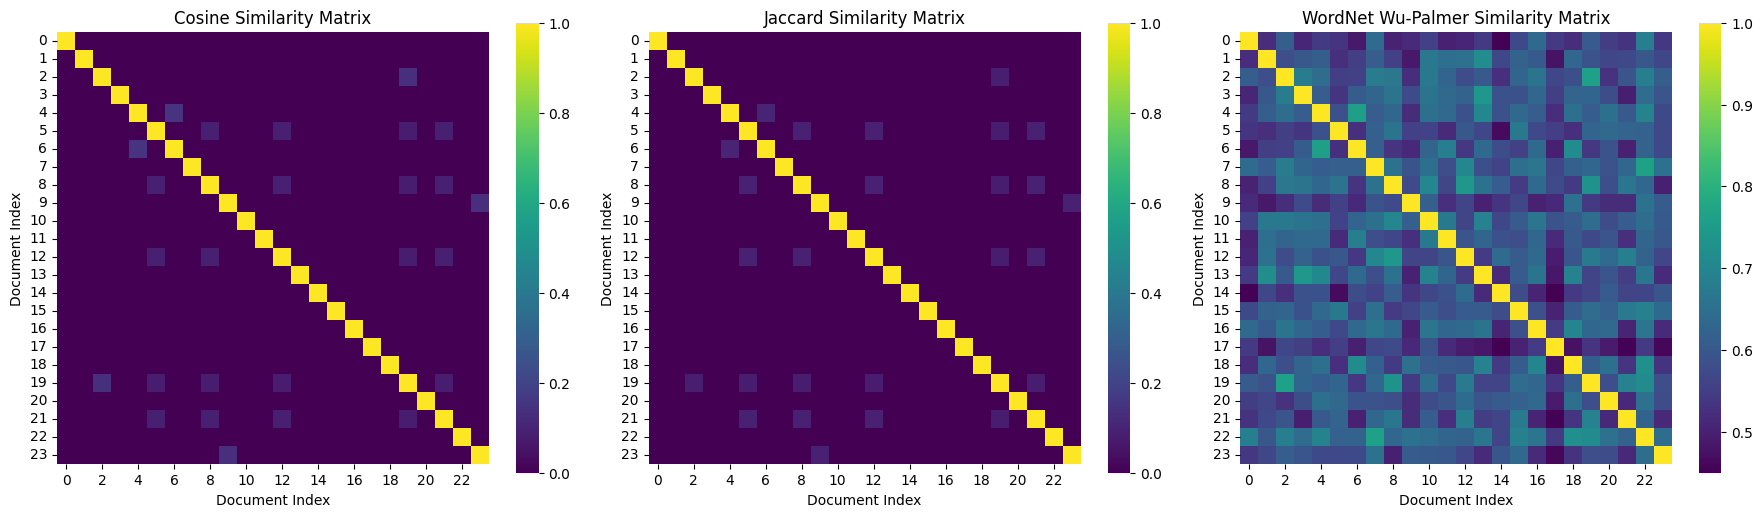

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# Cosine Similarity Heatmap
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.heatmap(sim_df, annot=False, cmap='viridis', fmt=".2f", cbar=True, square=True)
plt.title('Cosine Similarity Matrix')
plt.xlabel('Document Index')
plt.ylabel('Document Index')

# Jaccard Similarity Heatmap
plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
sns.heatmap(jaccard_df, annot=False, cmap='viridis', fmt=".2f", cbar=True, square=True)
plt.title('Jaccard Similarity Matrix')
plt.xlabel('Document Index')
plt.ylabel('Document Index')

# WordNet Wu-Palmer Similarity Heatmap
plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
sns.heatmap(wordnet_wup_df, annot=False, cmap='viridis', fmt=".2f", cbar=True, square=True)
plt.title('WordNet Wu-Palmer Similarity Matrix')
plt.xlabel('Document Index')
plt.ylabel('Document Index')

plt.tight_layout()
plt.show()